# <span style="color:gray"> O problema do ajuste de uma linha reta </span>

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import binom
import matplotlib.pyplot as plt
#import os,sys
#Configurando figura e o rc parameters
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (15,5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

<span style="color:gray">Suponha que $N$ medidas de temperatura são feitas em $T_{i}$ momentos diferentes, na atmosfera  </span>

In [2]:
%%time
np.random.seed(20)# fixa o gerador de números aleatórios
limpo = np.linspace(-10, 30, 92)
#print(limpo,np.size(limpo))
ruido = np.cumsum(np.random.normal(0, 1, limpo.shape))
#print(ruido,np.size(ruido))
d = limpo + ruido
print(d)
#d= np.cumsum(np.random.randn(92,1))# vetor anomalia de temperatura (dado) #np.random.choice(np.arange(-0.5,1.2,0.2), 92)# vetor anomalia de temperatura em uma faixa específica de temperatura
#print(d)
t= np.arange(1965,2011,0.5)# vetor tempo (número de medições)
#print(t)
#print("Ranks=",np.size(d),"e",np.size(t))

[ -9.11610689  -8.48068143  -7.68358447  -9.58728594 -10.23255808
  -9.23330136  -7.85427157  -8.39319217  -7.45053489  -6.60455998
  -5.84153853  -5.89538897  -6.24784532  -6.65065282  -7.49059504
  -6.80531943  -6.40995379  -4.4027608   -2.91209168  -2.06616282
  -1.79524848  -4.54539083  -2.98569813  -1.21335948  -1.01713781
  -0.70760808  -0.37706501   1.61868187   2.18702066   0.55963238
   0.11369966  -0.55131938   0.8211074    3.32050585   2.82512833
   1.65169855   2.61832871   1.50678841   2.27596219   1.57899609
   1.68006592   2.44059715   2.27784957   4.26213837   5.34873289
   6.38151054   7.25909548   9.05644494  10.70051665  12.49187328
  13.42487095  11.16006614  11.04444079  11.48550979  12.78216404
  14.70286813  14.92276745  16.86572604  15.82290143  15.40629765
  15.01716532  15.57077337  16.53806228  17.13346094  18.87445078
  18.31920931  20.85343509  21.65242452  22.78298708  21.73682791
  22.27517696  22.48641637  22.07120132  21.99761666  21.47496111
  21.43207

<span style="color:gray">, conforme a figura abaixo.</span>

CPU times: user 25.8 ms, sys: 0 ns, total: 25.8 ms
Wall time: 25.8 ms


Text(0, 0.5, 'Anomalia de temperatura, Ti (Graus Celcius)')

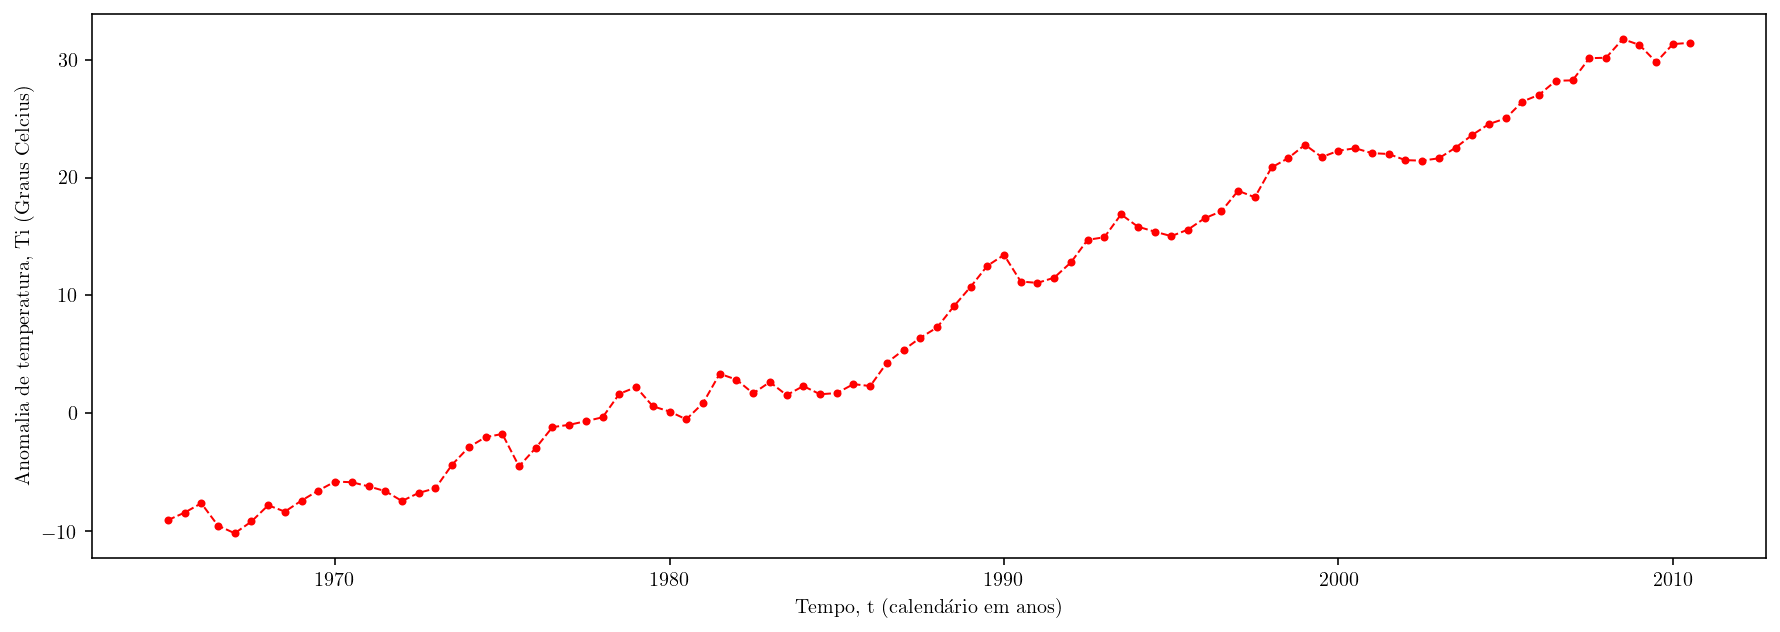

In [3]:
%%time
plt.plot(t,d,color='red', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.xlabel('Tempo, t (calendário em anos)')  
plt.ylabel('Anomalia de temperatura, Ti (Graus Celcius)')

O dado é representado pelo vetor \textbf{d} com $N$ medidas de temperatura, onde \textbf{d} $  = [T_{1},T_{2},T_{3},\dots,T_{n}]$. O tempo ou a variável \textbf{t} não é necessariamente um dado físico, mas trás consigo informações sobre a geometria do problema.

Supondo que nós assumimos um modelo no qual a temperatura é uma função linear do tipo $ T = a + bt $. O coeficiente angular $a$ e o coeficiente linear $b$ formam os dois modelos de parâmetros do problema, \textbf{m}$=[a b]^{T}$. E de acordo com este modelo, cada observação de temperatura deve satisfazer $T_{i}=a+bt_{i}$. Ou seja, $$T_{1}=a+bt_{1} \\ T_{2}=a+bt_{2} \\ T_{3}=a+bt_{3} \\ \vdots \\ T_{N}=a+bt_{N}$$

Essas equações podem ser reescritas na forma matricial como \textbf{d} = \textbf{G}\textbf{m}

$$ T_{n}=a+bt_{n} \nonumber \\ T_{n} = \begin{bmatrix} \frac{\partial T_{n}}{\partial a} & \frac{\partial T_{n}}{\partial b} \end{bmatrix}  \begin{bmatrix} a \\  b \end{bmatrix} $$

$$ 
\begin{bmatrix} 
T_{1} \\
T_{2} \\
\vdots \\
T_{N}  \\
\end{bmatrix}
\quad
=
\quad
\begin{bmatrix} 
1      & t_{1} \\
1      & t_{2} \\
\vdots & \vdots \\
1      & t_{N}  \\
\end{bmatrix}
\quad
\begin{bmatrix} 
a \\
b \\
\end{bmatrix}
$$

Onde \textbf{G} é a matriz kernel, matriz sensibilidade ou matriz Jacobiana. A matriz Jacobiana é montada derivando-se parcialmente em relação aos parâmetros o funcional geofísico. O problema é bem posto porque o rank da matriz é igual ao número de parâmetros do problema. Matriz G é composta de vetores linearmente independentes. Valores das colunas da matriz sensibilidade devem ser diferentes de zero. 

In [4]:
# montando a matiz Jacobiana: matriz sensibilidade
ones=np.ones_like(t)
G=np.column_stack((ones,t))#melhor método para juntar arrays 1D
print(G.shape)# retorna o shape da matriz sensibilidade

(92, 2)


# Solução: o início do processo

O ínício do processo de solução de qualquer problema inverso se trata de saber os valores numéricos do seu modelo de parâmetros. Alguns problemas podem ocorrer na busca destes valores: a falta de dados suficientes, medidas erradas, e o fato do modelo de parâmetros não estar de acordo com nenhuma observação.  

Uma forma de solução é calcular os valores do seu modelo por meio de uma \textbf{estimativa}. A estimativa é o mais usual tipo de solução utilizada em problemas inversos, contudo pode ser dúbia.Esta dubiedade, noenteanto, pode levar a uma boa ideia sobre a qualidade da solução.    

Dependendo do problema proposto o erro pode estar acima da média, ou podem ser amplificados. Em outros problemas a colução podem existir várias soluções. Par destacar o conjunto único que representa a melhor solução que minimiza o problema proposto será utilizada a notação \textbf{m}$_{est}$ para dar a falsa impressão de que somente uma solução foi obtida. 

## Cálculo da solução para o vetor de parâmetros m, via mínimos quadrados

$$ d= Gm \\ G^{T}d=G^{T}Gm \\ m_{est}= (G^{T}G)^{-1} G^{T}d \\ $$
São utilizados duas operações fundamentais da álgebra linear. A primeira delas é a multiplicação de uma matriz pela sua transposta, cujo resultado será sempre a matriz identidade, nos dois membros da equação para isolar o vetor \textbf{m}. A segunda é a a divisão matricial indicada pelo expoente negativo.  

In [5]:
#Solução do problema inverso quando bem posto: (cálculos dos parâmetros a,b)
m=np.linalg.solve(np.dot(G.T,G),np.dot(G.T,d))
print(m)
a=m[0]
b=m[1]
print(a,b)

[-1.88310702e+03  9.51902961e-01]
-1883.1070154311087 0.9519029613375809


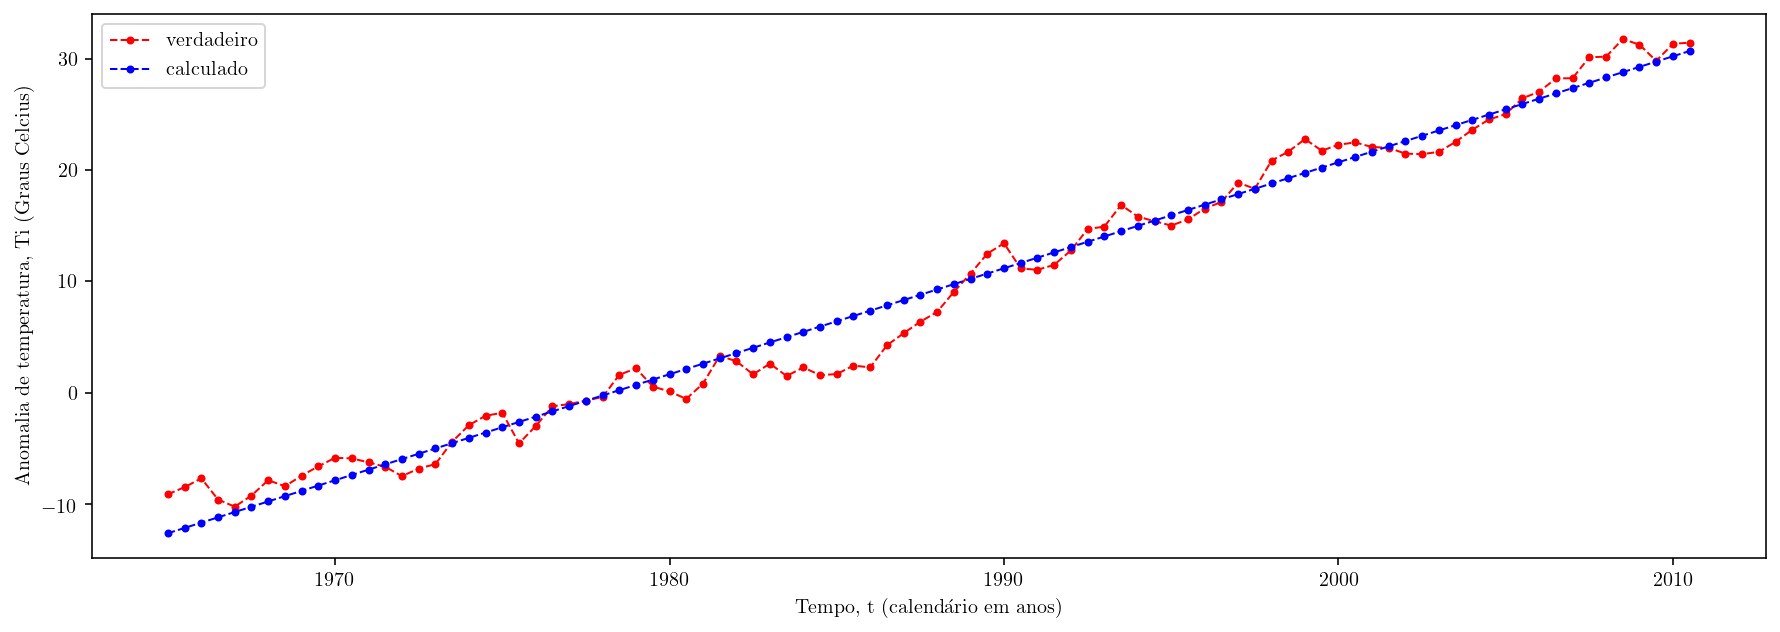

In [6]:
#dcalculado=at+b
dest=np.empty_like(d)
dest= a+b*t
#print(dcalc,np.size(dcalc))



plt.plot(t,d,color='red', marker='o', linestyle='dashed', linewidth=1, markersize=3, label='verdadeiro')
plt.plot(t,dest,color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3,label='calculado')
plt.xlabel('Tempo, t (calendário em anos)')  
plt.ylabel('Anomalia de temperatura, Ti (Graus Celcius)')
plt.legend()
plt.savefig('ajuste.png')


## Valores limítrofes

Uma vez definido o \textbf{m}$_{est}$ é preciso aferir a qualidade das medidas. E isto é feito adicionando alguns limites que definem a certeza das previsões. Estes limites podem ser \textbf{absolutos} ou \textbf{probabilísticos}. Limites absolutos implicam em dizer que o valor real do parâmetro esta limitado por dois fatores, por exemplo, $1,3 \leq m_{1}\leq 1,5$. Limites probabilísticos fazem com que os limites supracitados flutuem sob um certo grau de incerteza, por exemplo $m_{1}^{est} = 1,4 \pm 0,1 (95\%)$ quer dizer que existe uma probabilidade de $95\%$ que o valor verdadeiro $m^{ver}_{1}$ esteja entre $1,3$ e $1,5$.   

Uma das formas mais importantes para se avaliar o modelo de parâmetros é através da análise da função densidade de probabilidade p(\textbf{m}). Existem três principais casos aonde esta análise pode dirigir o intérprete.  A primeira é dada por uma distribuição normal da função densidade de probabilidade do seu modelo de parâmetros. Uma distrbuição normal indica que os valores limites estão delimitados pelo formato do gráfico ao longo da região central. 

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

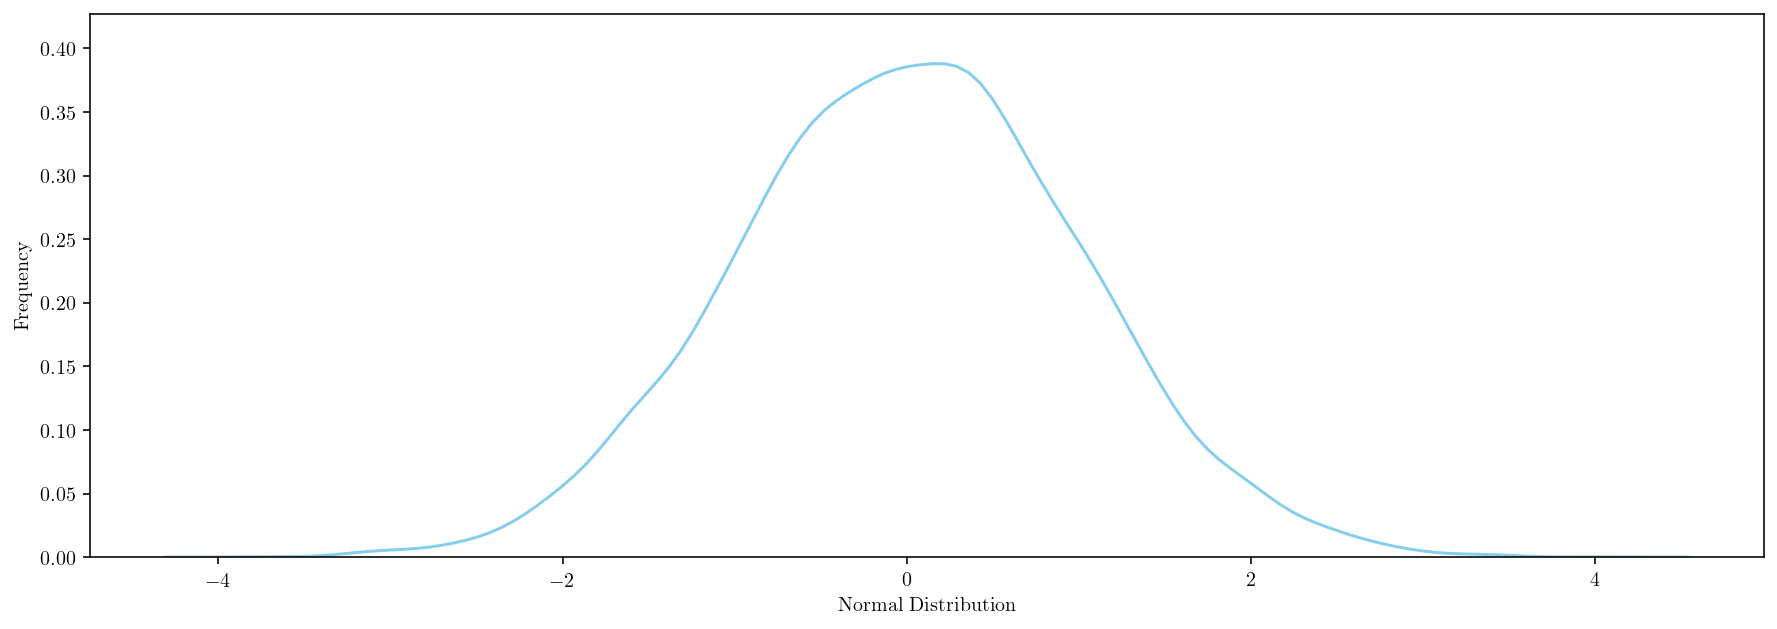

In [7]:
data_normal = norm.rvs(size=10000,loc=0,scale=1)
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':0})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

Uma distribuição binomial indica que o modelos de parâ,metros possui complexididade intermediária e responde ao modelo verdadeiro. 

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

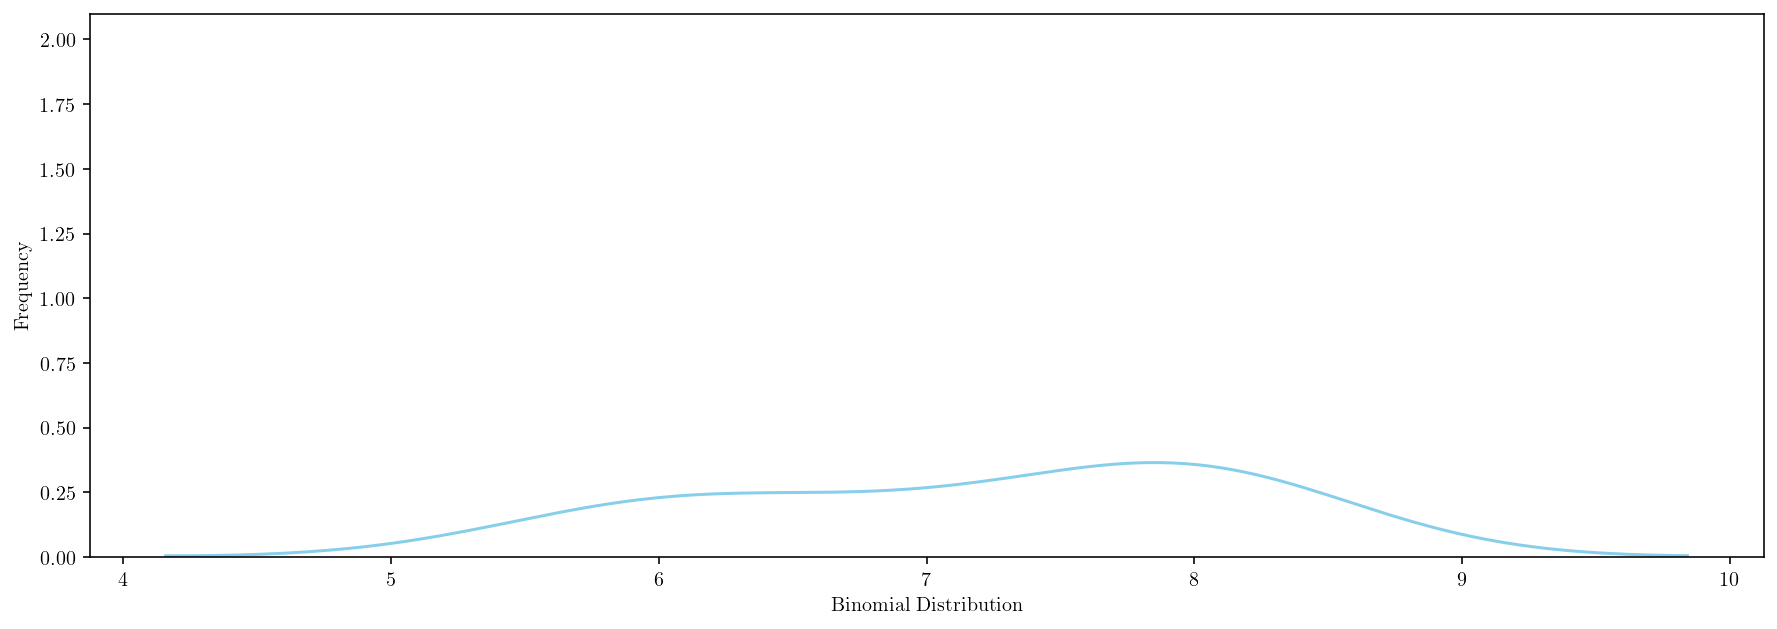

In [8]:
data_binom = binom.rvs(n=8,p=0.8,size=10)
ax = sns.distplot(data_binom,
                  bins=8,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':0})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')


Quando a função de densidade apresenta múltiplos picos indica que o modelo de parâmetros não pode ser bem estimado. 

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

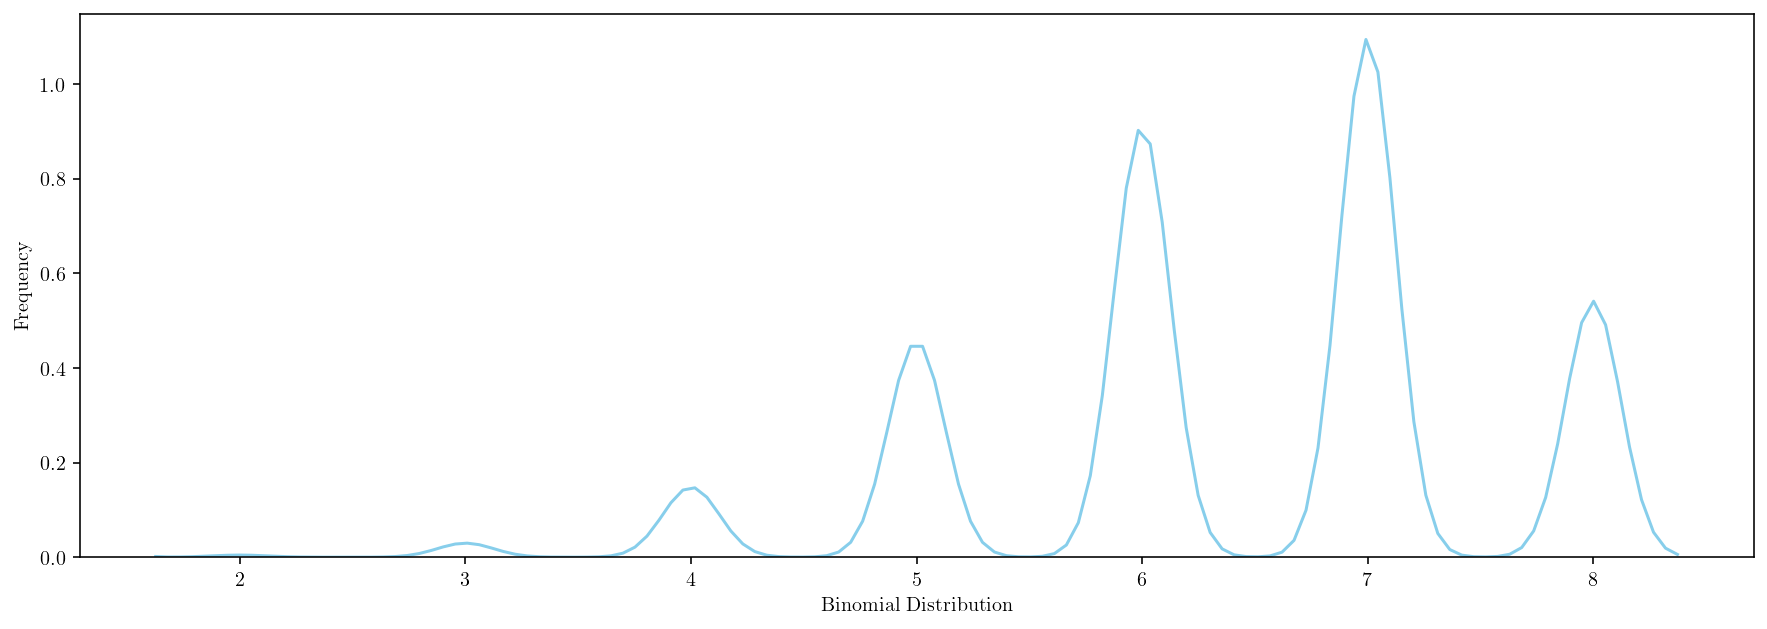

In [9]:
data_binom = binom.rvs(n=8,p=0.8,size=10000)
ax = sns.distplot(data_binom,
                  bins=8,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':0})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')


Resíduo: $e_{i} = d^{ver}_{i}-d^{est}_{i} \\ =  d^{ver}_{i} - G_{ij}  m_{j}^{est}$ 

Erro total E = $\sum^{N}_{i=1} e^{2}_{i}$ =  \textbf{e}$^{T}$\textbf{e} 

In [21]:
e = d - dest # resíduos
eT = np.transpose(e)
ErroTot= np.dot(eT,e) # via norma L1 no caso da L2 calcula-se a raíz quadrada


332.4206266705732


[Text(0, 0.5, 'Frequencia p(d)'),
 Text(0.5, 0, 'Desidade de probabilidade (e)')]

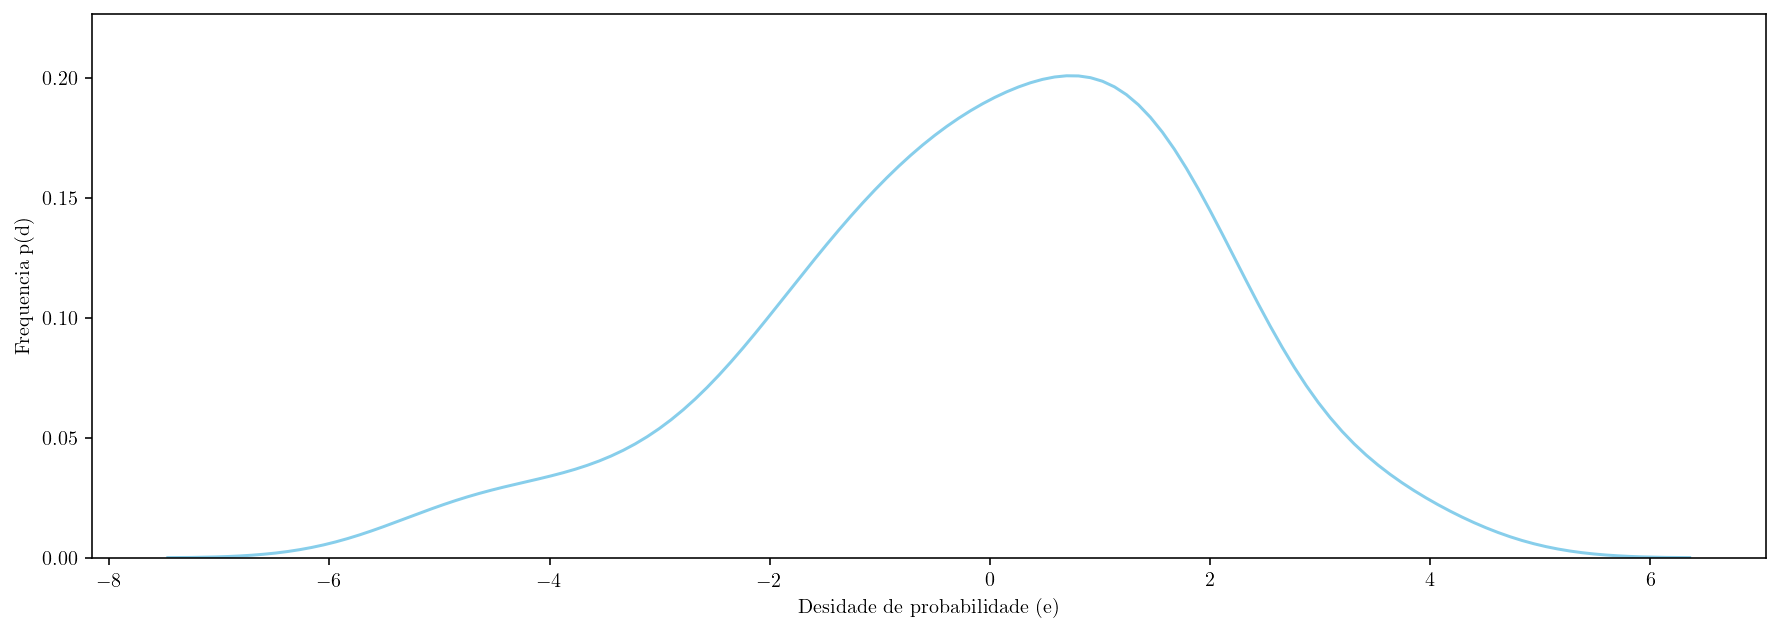

In [34]:
ax = sns.distplot(e,
                  bins=10,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':0})
ax.set(xlabel='Desidade de probabilidade (e)', ylabel='Frequencia p(d)')

In [38]:
media = np.mean(e)
desvpad = np.std(e)
print(media,desvpad)

-1.8226965830367786e-13 1.9008597216001717


## E quando o problema é mal-posto??? O que fazer????

Um problema é considerado mal-posto quando os vetores que compõe a matriz identidade são linearmente depentes. Ou quando a diferença entre os elementos de cada linha são nulos ou próximos de zero.  Nestes casos é necessário calcular o vetor de parâmetros via regularizador. Isto é uma relação que aproximará o vetor de parâmetros **calculado** ao **verdadeiro valor** do vetor de parâmteros. Ou seja, ele nunca será o valor verdadeiro, mas a busca trata-se, agora, de achar o melhor conjunto de valor de parâmetros

### Regularizador Tikonov de ordem 0

$$ m_{calc}= [(G^{T}G)^{-1} G^{T}+ \mu \textbf{I}] d$$
